In [1]:
# import necessary packages
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
pd.options.display.max_columns = None
import numpy as np
from plotnine import *
import statsmodels.api as sm

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler #Z-score variables
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split # simple TT split cv


from sklearn.model_selection import cross_val_score # cross validation metrics
from sklearn.model_selection import cross_val_predict # cross validation metrics
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import GridSearchCV
import time

import xgboost as xgb
from xgboost import XGBClassifier

#NOTES

1. Determine the most valuable subscribers 

remove free trial start and expiration
dropna
make some sort of regressor to predict USD purchase amount

2. Understanding the subscriber segments present in the database
tableau idk


3. likely subscribers who could be sold additional products or services
send rate calculation


4. identify the subscriber profile of those not continuing with their usage of the product and identify the barriers to deeper subscriber engagement where possible

count of yes on email list / total entries in column

logistic regression or smth that predicts probabilities on auto renew. 

5. Outline any business relevant opportunities that are present from your analysis of the data no covered above


In [2]:
appActivity = pd.read_csv('https://raw.githubusercontent.com/a-rea/mgsc410finalprojectData/main/App%20activity%20(Chapman%20data%20extract%2C%20Apr%202020).csv')
dataDictionary = pd.read_csv('https://raw.githubusercontent.com/a-rea/mgsc410finalprojectData/main/Data%20dictionary%20(Chapman%20data%20extract%2C%20Apr%202020).csv')
subscriberInfo = pd.read_csv('https://raw.githubusercontent.com/a-rea/mgsc410finalprojectData/main/Subscriber%20Information%20(Chapman%20data%20extract%2C%20Apr%202020).csv')

In [ ]:
subscriberInfo

,ID,Language,Subscription Type,Subscription Event Type,Purchase Store,Purchase Amount,Currency,Subscription Start Date,Subscription Expiration,Demo User,Free Trial User,Free Trial Start Date,Free Trial Expiration,Auto Renew,Country,User Type,Lead Platform,Email Subscriber,Push Notifications,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count
0,1,POR,Limited,INITIAL_PURCHASE,App,NaN,NaN,12/28/2018,6/28/2019,Yes,No,NaN,NaN,Off,US/Canada,Consumer,App,Yes,Yes,63.0,7.0,0.0,6.0,0.0
1,2,EBR,Limited,INITIAL_PURCHASE,Web,39.0,USD,11/28/2019,2/28/2020,No,No,NaN,NaN,Off,Other,Consumer,Web,No,Yes,4.0,3.0,0.0,1.0,0.0
2,3,ESP,Limited,INITIAL_PURCHASE,Web,0.0,USD,12/31/2018,12/31/2019,No,No,NaN,NaN,Off,US/Canada,Consumer,Web,Yes,Yes,1.0,0.0,0.0,0.0,0.0
3,4,KOR,Limited,INITIAL_PURCHASE,App,NaN,NaN,11/7/2019,2/7/2020,Yes,No,NaN,NaN,Off,US/Canada,Consumer,App,Yes,Yes,14.0,0.0,0.0,0.0,0.0
4,5,ENG,Limited,INITIAL_PURCHASE,App,NaN,NaN,8/13/2019,11/13/2019,No,No,NaN,NaN,Off,US/Canada,Consumer,Web,Yes,Yes,80.0,5.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40097,39996,DEU,Limited,INITIAL_PURCHASE,Web,39.0,GBP,6/20/2019,4/14/2020,No,No,NaN,NaN,Off,Other,Other,Unknown,No,No,1.0,0.0,0.0,0.0,0.0
40098,39997,FRA,Limited,RENEWAL,App,NaN,NaN,2/24/2019,8/23/2019,No,No,NaN,NaN,Off,Other,Other,Unknown,No,No,NaN,NaN,NaN,NaN,NaN
40099,39998,TUR,Limited,RENEWAL,Web,10.0,GBP,5/15/2019,8/16/2019,No,No,NaN,NaN,Off,Europe,Consumer,Web,No,Yes,NaN,NaN,NaN,NaN,NaN
40100,39999,FRA,Limited,INITIAL_PURCHASE,App,NaN,NaN,12/30/2019,3/30/2020,Yes,No,NaN,NaN,On,US/Canada,Consumer,Web,Yes,Yes,2.0,0.0,0.0,0.0,0.0


In [ ]:
subscriberInfo.isnull().sum()

ID                             0
Language                       0
Subscription Type              0
Subscription Event Type        0
Purchase Store                 0
Purchase Amount            13179
Currency                   13178
Subscription Start Date        0
Subscription Expiration        0
Demo User                      0
Free Trial User                0
Free Trial Start Date      34269
Free Trial Expiration      34269
Auto Renew                     1
Country                        0
User Type                      0
Lead Platform                  0
Email Subscriber               0
Push Notifications             0
Send Count                 11654
Open Count                 11654
Click Count                11654
Unique Open Count          11654
Unique Click Count         11654
dtype: int64

In [ ]:
subscriberInfo[subscriberInfo["ID"] == 3]

,ID,Language,Subscription Type,Subscription Event Type,Purchase Store,Purchase Amount,Currency,Subscription Start Date,Subscription Expiration,Demo User,Free Trial User,Free Trial Start Date,Free Trial Expiration,Auto Renew,Country,User Type,Lead Platform,Email Subscriber,Push Notifications,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count
2,3,ESP,Limited,INITIAL_PURCHASE,Web,0.0,USD,12/31/2018,12/31/2019,No,No,NaN,NaN,Off,US/Canada,Consumer,Web,Yes,Yes,1.0,0.0,0.0,0.0,0.0


In [3]:
subscriberInfo = subscriberInfo.drop(['Free Trial Start Date', 'Free Trial Expiration'], axis=1)
subscriberInfo

,ID,Language,Subscription Type,Subscription Event Type,Purchase Store,Purchase Amount,Currency,Subscription Start Date,Subscription Expiration,Demo User,Free Trial User,Auto Renew,Country,User Type,Lead Platform,Email Subscriber,Push Notifications,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count
0,1,POR,Limited,INITIAL_PURCHASE,App,NaN,NaN,12/28/2018,6/28/2019,Yes,No,Off,US/Canada,Consumer,App,Yes,Yes,63.0,7.0,0.0,6.0,0.0
1,2,EBR,Limited,INITIAL_PURCHASE,Web,39.0,USD,11/28/2019,2/28/2020,No,No,Off,Other,Consumer,Web,No,Yes,4.0,3.0,0.0,1.0,0.0
2,3,ESP,Limited,INITIAL_PURCHASE,Web,0.0,USD,12/31/2018,12/31/2019,No,No,Off,US/Canada,Consumer,Web,Yes,Yes,1.0,0.0,0.0,0.0,0.0
3,4,KOR,Limited,INITIAL_PURCHASE,App,NaN,NaN,11/7/2019,2/7/2020,Yes,No,Off,US/Canada,Consumer,App,Yes,Yes,14.0,0.0,0.0,0.0,0.0
4,5,ENG,Limited,INITIAL_PURCHASE,App,NaN,NaN,8/13/2019,11/13/2019,No,No,Off,US/Canada,Consumer,Web,Yes,Yes,80.0,5.0,1.0,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40097,39996,DEU,Limited,INITIAL_PURCHASE,Web,39.0,GBP,6/20/2019,4/14/2020,No,No,Off,Other,Other,Unknown,No,No,1.0,0.0,0.0,0.0,0.0
40098,39997,FRA,Limited,RENEWAL,App,NaN,NaN,2/24/2019,8/23/2019,No,No,Off,Other,Other,Unknown,No,No,NaN,NaN,NaN,NaN,NaN
40099,39998,TUR,Limited,RENEWAL,Web,10.0,GBP,5/15/2019,8/16/2019,No,No,Off,Europe,Consumer,Web,No,Yes,NaN,NaN,NaN,NaN,NaN
40100,39999,FRA,Limited,INITIAL_PURCHASE,App,NaN,NaN,12/30/2019,3/30/2020,Yes,No,On,US/Canada,Consumer,Web,Yes,Yes,2.0,0.0,0.0,0.0,0.0


In [ ]:
subscriberInfo.isnull().sum()

ID                             0
Language                       0
Subscription Type              0
Subscription Event Type        0
Purchase Store                 0
Purchase Amount            13179
Currency                   13178
Subscription Start Date        0
Subscription Expiration        0
Demo User                      0
Free Trial User                0
Auto Renew                     1
Country                        0
User Type                      0
Lead Platform                  0
Email Subscriber               0
Push Notifications             0
Send Count                 11654
Open Count                 11654
Click Count                11654
Unique Open Count          11654
Unique Click Count         11654
dtype: int64

In [4]:
subscriberInfo = subscriberInfo.dropna()

In [ ]:
subscriberInfo.isnull().sum()

ID                         0
Language                   0
Subscription Type          0
Subscription Event Type    0
Purchase Store             0
Purchase Amount            0
Currency                   0
Subscription Start Date    0
Subscription Expiration    0
Demo User                  0
Free Trial User            0
Auto Renew                 0
Country                    0
User Type                  0
Lead Platform              0
Email Subscriber           0
Push Notifications         0
Send Count                 0
Open Count                 0
Click Count                0
Unique Open Count          0
Unique Click Count         0
dtype: int64

* add column to app activity which is a count of completed based off user ID (completed by ID)

* combine the subsriber info with the new, updated app activity to see how much they completed

In [ ]:
appActivity.head(50)

,ID,App Session Platform,App Activity Type,App Session Date
0,1,ios,App Launch,3/20/2019
1,2,android,App Launch,12/3/2019
2,3,ios,App Launch,5/2/2019
3,4,ios,App Launch,2/6/2020
4,5,ios,Start,9/14/2019
5,6,android,Completed,8/26/2019
6,7,android,Start,7/21/2019
7,8,ios,Completed,2/27/2020
8,9,web,App Launch,3/30/2020
9,10,ios,App Launch,3/23/2019


In [ ]:
appActivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809478 entries, 0 to 809477
Data columns (total 4 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   ID                    809478 non-null  int64 
 1   App Session Platform  765300 non-null  object
 2   App Activity Type     795058 non-null  object
 3   App Session Date      795058 non-null  object
dtypes: int64(1), object(3)
memory usage: 24.7+ MB


In [ ]:
dataDictionary.head()

,Language,language selected by subscriber
0,Subscription Type,Limited = subscription has a defined expiratio...
1,Subscription Event Type,Type of purchase; initial purchase or renewal
2,Purchase Store,Web or app
3,Purchase Amount,"Amount paid for subscription, available for we..."
4,Currency,Currency for purchase amount


In [ ]:
subscriberInfo.head()

,ID,Language,Subscription Type,Subscription Event Type,Purchase Store,Purchase Amount,Currency,Subscription Start Date,Subscription Expiration,Demo User,Free Trial User,Auto Renew,Country,User Type,Lead Platform,Email Subscriber,Push Notifications,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count
1,2,EBR,Limited,INITIAL_PURCHASE,Web,39.00,USD,11/28/2019,2/28/2020,No,No,Off,Other,Consumer,Web,No,Yes,4.0,3.0,0.0,1.0,0.0
2,3,ESP,Limited,INITIAL_PURCHASE,Web,0.00,USD,12/31/2018,12/31/2019,No,No,Off,US/Canada,Consumer,Web,Yes,Yes,1.0,0.0,0.0,0.0,0.0
5,6,ESP,Limited,INITIAL_PURCHASE,Web,38.34,USD,8/23/2019,11/23/2019,Yes,No,Off,US/Canada,Consumer,App,Yes,Yes,162.0,1.0,0.0,1.0,0.0
6,7,ESP,Limited,RENEWAL,Web,79.00,USD,7/21/2019,11/11/2019,Yes,No,Off,Other,Consumer,App,Yes,Yes,2.0,0.0,0.0,0.0,0.0
7,8,DEU,Limited,INITIAL_PURCHASE,Web,38.40,USD,3/7/2020,6/7/2020,Yes,No,On,US/Canada,Consumer,App,Yes,Yes,25.0,17.0,4.0,7.0,2.0


In [ ]:
print(subscriberInfo['Currency'].unique())

['USD' 'GBP' 'EUR' 'CHF' 'CAD' 'BRL' 'JPY' 'TRY' 'AUD' 'VND' 'ILS' 'MXN'
 'SGD' 'RON' 'RUB' 'KZT' 'HKD' 'CLP' 'PLN' 'AED' 'KRW' 'THB' 'NOK' 'SEK'
 'BGN']


In [ ]:
print(subscriberInfo['Subscription Type'].unique())

['Limited' 'Lifetime']


In [ ]:
subscriberInfo['Currency'].value_counts()

USD    16732
EUR     1585
GBP     1107
CAD       36
BRL        7
AUD        5
CHF        4
TRY        3
MXN        2
RUB        2
VND        2
ILS        2
AED        2
PLN        1
NOK        1
SEK        1
THB        1
KRW        1
SGD        1
CLP        1
HKD        1
KZT        1
RON        1
JPY        1
BGN        1
Name: Currency, dtype: int64

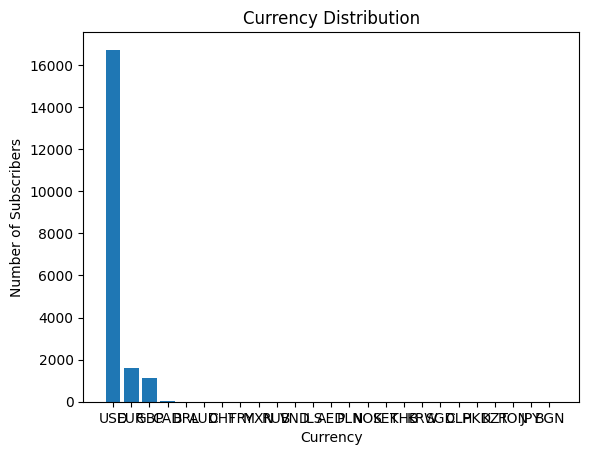

In [ ]:
import matplotlib.pyplot as plt

# Get the value counts for the 'Currency' column
currency_counts = subscriberInfo['Currency'].value_counts()

# Create a bar chart
plt.bar(currency_counts.index, currency_counts.values)

# Add a title and axis labels
plt.title('Currency Distribution')
plt.xlabel('Currency')
plt.ylabel('Number of Subscribers')

# Display the chart
plt.show()


In [ ]:
subscriberInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19501 entries, 1 to 40097
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       19501 non-null  int64  
 1   Language                 19501 non-null  object 
 2   Subscription Type        19501 non-null  object 
 3   Subscription Event Type  19501 non-null  object 
 4   Purchase Store           19501 non-null  object 
 5   Purchase Amount          19501 non-null  float64
 6   Currency                 19501 non-null  object 
 7   Subscription Start Date  19501 non-null  object 
 8   Subscription Expiration  19501 non-null  object 
 9   Demo User                19501 non-null  object 
 10  Free Trial User          19501 non-null  object 
 11  Auto Renew               19501 non-null  object 
 12  Country                  19501 non-null  object 
 13  User Type                19501 non-null  object 
 14  Lead Platform         

In [5]:
subscriberInfo['Subscription Start Date'] = pd.to_datetime(subscriberInfo['Subscription Start Date'])
subscriberInfo['Subscription Expiration'] = pd.to_datetime(subscriberInfo['Subscription Expiration'])

In [6]:
subscriberInfo = subscriberInfo.fillna(0)

subscriberInfo['Purchase Amount'] = subscriberInfo['Purchase Amount'].astype(float)
subscriberInfo['Send Count'] = subscriberInfo['Send Count'].astype(int)
subscriberInfo['Open Count'] = subscriberInfo['Open Count'].astype(int)
subscriberInfo['Click Count'] = subscriberInfo['Click Count'].astype(int)
subscriberInfo['Unique Open Count'] = subscriberInfo['Unique Open Count'].astype(int)
subscriberInfo['Unique Click Count'] = subscriberInfo['Unique Click Count'].astype(int)

In [7]:
exchange_rates = {
    'USD': 1.0,
    'GBP': 1.26,
    'PLN': 0.2492,
    'EUR': 1.10,
    'BRL': 0.1959,
    'KRW': 0.0008,
    'MXN': 0.0560,
    'UAH': 0.0271,
    'RUB': 0.0120,
    'CHF': 1.12,
    'CAD': 0.74,
    'CZK': 0.0473,
    'RON': 0.2384,
    'AUD': 0.66,
    'THB': 0.0295,
    'JPY': 0.0073,
    'INR': 0.0123,
    'COP': 0.0002,
    'BGN': 0.56,
    'ZAR': 0.054,
    'HUF': 0.0032,
    'SAR': 0.2667,
    'TRY': 0.051,
    'SGD': 0.75,
    'VND': 0.000043,
    'RSD': 0.0095,
    'ILS': 0.27,
    'SEK': 0.097,
    'PHP': 0.018,
    'NOK': 0.094,
    'EGP': 0.032,
    'QAR': 0.2747,
    'IDR': 0.0001,
    'PEN': 0.27,
    'AED': 0.2722,
    'LBP': 0.00006,
    'KZT': 0.0022,
    'GHS': 0.085,
    'HKD': 0.1284,
    'CLP': 0.0012,
    'CRC': 0.0019,
    'NZD': 0.62,
    'DKK': 0.1571,
    'MYR': 0.2391,
    }


In [8]:
# create a function to convert currency to USD
def convert_to_usd(row):
    if row["Currency"] == "USD" or row["Currency"] == 0:
        return row["Purchase Amount"]
    else:
        # get the exchange rate from the dictionary
        exchange_rate = exchange_rates[row["Currency"]]
        # calculate the purchase amount in USD
        usd_amount = row["Purchase Amount"] * exchange_rate
        return usd_amount

# create a new column "USD Purchase Amount"
subscriberInfo["USD Purchase Amount"] = subscriberInfo.apply(convert_to_usd, axis=1)

In [ ]:
subscriberInfo

,ID,Language,Subscription Type,Subscription Event Type,Purchase Store,Purchase Amount,Currency,Subscription Start Date,Subscription Expiration,Demo User,Free Trial User,Auto Renew,Country,User Type,Lead Platform,Email Subscriber,Push Notifications,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count,USD Purchase Amount
1,2,EBR,Limited,INITIAL_PURCHASE,Web,39.00,USD,2019-11-28,2020-02-28,No,No,Off,Other,Consumer,Web,No,Yes,4,3,0,1,0,39.0000
2,3,ESP,Limited,INITIAL_PURCHASE,Web,0.00,USD,2018-12-31,2019-12-31,No,No,Off,US/Canada,Consumer,Web,Yes,Yes,1,0,0,0,0,0.0000
5,6,ESP,Limited,INITIAL_PURCHASE,Web,38.34,USD,2019-08-23,2019-11-23,Yes,No,Off,US/Canada,Consumer,App,Yes,Yes,162,1,0,1,0,38.3400
6,7,ESP,Limited,RENEWAL,Web,79.00,USD,2019-07-21,2019-11-11,Yes,No,Off,Other,Consumer,App,Yes,Yes,2,0,0,0,0,79.0000
7,8,DEU,Limited,INITIAL_PURCHASE,Web,38.40,USD,2020-03-07,2020-06-07,Yes,No,On,US/Canada,Consumer,App,Yes,Yes,25,17,4,7,2,38.4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40092,39991,ESP,Limited,INITIAL_PURCHASE,Web,35.97,USD,2020-03-10,2020-06-10,No,No,On,Other,Other,Unknown,No,No,16,10,0,1,0,35.9700
40093,39992,ESP,Limited,RENEWAL,Web,35.97,USD,2019-12-24,2020-06-24,No,No,On,Other,Other,Unknown,No,No,4,0,0,0,0,35.9700
40094,39993,KOR,Limited,INITIAL_PURCHASE,Web,15.83,GBP,2019-01-12,2019-02-12,No,No,Off,Europe,Consumer,Web,Yes,Yes,40,0,0,0,0,19.9458
40095,39994,ALL,Lifetime,INITIAL_PURCHASE,Web,212.13,USD,2020-03-15,2099-01-01,No,No,Off,Other,Other,Unknown,No,No,6,2,0,2,0,212.1300


In [ ]:
subscriberInfo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19501 entries, 1 to 40097
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   ID                       19501 non-null  int64         
 1   Language                 19501 non-null  object        
 2   Subscription Type        19501 non-null  object        
 3   Subscription Event Type  19501 non-null  object        
 4   Purchase Store           19501 non-null  object        
 5   Purchase Amount          19501 non-null  float64       
 6   Currency                 19501 non-null  object        
 7   Subscription Start Date  19501 non-null  datetime64[ns]
 8   Subscription Expiration  19501 non-null  datetime64[ns]
 9   Demo User                19501 non-null  object        
 10  Free Trial User          19501 non-null  object        
 11  Auto Renew               19501 non-null  object        
 12  Country                  19501 n

#REMOVING THE CRAZY HIGH AMOUNTS OF USD PURCHASE AMOUNTS

<Axes: >

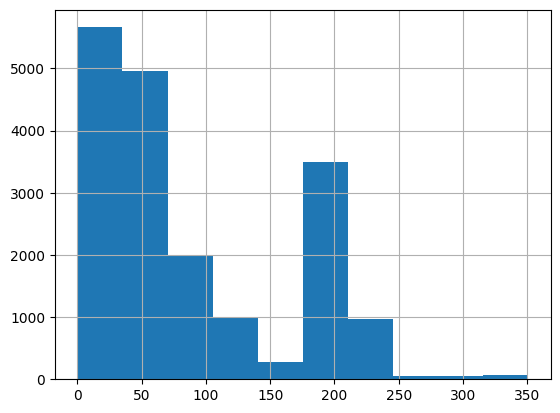

In [9]:

# Calculate the 75th percentile value of the column
pct95 = subscriberInfo['USD Purchase Amount'].quantile(0.95)

# Create a new column with the values below the 75th percentile
subscriberInfo['USD Purchase Amount Clean'] = subscriberInfo[subscriberInfo['USD Purchase Amount'] <= pct95]['USD Purchase Amount']

# Plot the distribution of the new column
subscriberInfo['USD Purchase Amount Clean'].hist()


In [10]:
subscriberInfo.isnull().sum()

ID                             0
Language                       0
Subscription Type              0
Subscription Event Type        0
Purchase Store                 0
Purchase Amount                0
Currency                       0
Subscription Start Date        0
Subscription Expiration        0
Demo User                      0
Free Trial User                0
Auto Renew                     0
Country                        0
User Type                      0
Lead Platform                  0
Email Subscriber               0
Push Notifications             0
Send Count                     0
Open Count                     0
Click Count                    0
Unique Open Count              0
Unique Click Count             0
USD Purchase Amount            0
USD Purchase Amount Clean    975
dtype: int64

#dont forget this code block below before running any code


In [11]:
subscriberInfo = subscriberInfo.dropna()

In [ ]:
max_payment = subscriberInfo['USD Purchase Amount'].max()

print(max_payment)

350.90000000000003


remove all the outliers


In [ ]:
subscriberInfo = subscriberInfo.drop(subscriberInfo[subscriberInfo['USD Purchase Amount'] == 131989000.00000001].index)


In [ ]:
subscriberInfo

,ID,Language,Subscription Type,Subscription Event Type,Purchase Store,Purchase Amount,Currency,Subscription Start Date,Subscription Expiration,Demo User,Free Trial User,Auto Renew,Country,User Type,Lead Platform,Email Subscriber,Push Notifications,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count,USD Purchase Amount,USD Purchase Amount Clean
1,2,EBR,Limited,INITIAL_PURCHASE,Web,39.00,USD,2019-11-28,2020-02-28,No,No,Off,Other,Consumer,Web,No,Yes,4,3,0,1,0,39.0000,39.0000
2,3,ESP,Limited,INITIAL_PURCHASE,Web,0.00,USD,2018-12-31,2019-12-31,No,No,Off,US/Canada,Consumer,Web,Yes,Yes,1,0,0,0,0,0.0000,0.0000
5,6,ESP,Limited,INITIAL_PURCHASE,Web,38.34,USD,2019-08-23,2019-11-23,Yes,No,Off,US/Canada,Consumer,App,Yes,Yes,162,1,0,1,0,38.3400,38.3400
6,7,ESP,Limited,RENEWAL,Web,79.00,USD,2019-07-21,2019-11-11,Yes,No,Off,Other,Consumer,App,Yes,Yes,2,0,0,0,0,79.0000,79.0000
7,8,DEU,Limited,INITIAL_PURCHASE,Web,38.40,USD,2020-03-07,2020-06-07,Yes,No,On,US/Canada,Consumer,App,Yes,Yes,25,17,4,7,2,38.4000,38.4000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40092,39991,ESP,Limited,INITIAL_PURCHASE,Web,35.97,USD,2020-03-10,2020-06-10,No,No,On,Other,Other,Unknown,No,No,16,10,0,1,0,35.9700,35.9700
40093,39992,ESP,Limited,RENEWAL,Web,35.97,USD,2019-12-24,2020-06-24,No,No,On,Other,Other,Unknown,No,No,4,0,0,0,0,35.9700,35.9700
40094,39993,KOR,Limited,INITIAL_PURCHASE,Web,15.83,GBP,2019-01-12,2019-02-12,No,No,Off,Europe,Consumer,Web,Yes,Yes,40,0,0,0,0,19.9458,19.9458
40095,39994,ALL,Lifetime,INITIAL_PURCHASE,Web,212.13,USD,2020-03-15,2099-01-01,No,No,Off,Other,Other,Unknown,No,No,6,2,0,2,0,212.1300,212.1300


In [ ]:
sorted = subscriberInfo.sort_values('USD Purchase Amount', ascending=False)
print(sorted)

# TRAIN/TEST SPLIT OF THE SUBSCRIBER INFO DATAFRAME

In [12]:
predictors = [c for c in subscriberInfo.columns if c != 'Auto Renew' and c != 'ID' and c != 'Purchase Amount' and c!= 'USD Purchase Amount' and c!= 'Subscription Start Date' and c!= 'Subscription Expiration']

x = subscriberInfo[predictors]
y = subscriberInfo['Auto Renew']

In [12]:
predictors

['Language',
 'Subscription Type',
 'Subscription Event Type',
 'Purchase Store',
 'Currency',
 'Demo User',
 'Free Trial User',
 'Country',
 'User Type',
 'Lead Platform',
 'Email Subscriber',
 'Push Notifications',
 'Send Count',
 'Open Count',
 'Click Count',
 'Unique Open Count',
 'Unique Click Count',
 'USD Purchase Amount Clean']

In [13]:
object_columns = subscriberInfo.select_dtypes(include='object').columns.tolist()
object_columns.remove('Auto Renew')
object_columns

['Language',
 'Subscription Type',
 'Subscription Event Type',
 'Purchase Store',
 'Currency',
 'Demo User',
 'Free Trial User',
 'Country',
 'User Type',
 'Lead Platform',
 'Email Subscriber',
 'Push Notifications']

In [14]:
x = pd.get_dummies(x, columns=object_columns, drop_first=True)

In [15]:
x

,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count,USD Purchase Amount Clean,Language_ARA,Language_CHI,Language_DAR,Language_DEU,Language_EBR,Language_ENG,Language_ESC,Language_ESP,Language_FAR,Language_FRA,Language_GLE,Language_GRK,Language_HEB,Language_HIN,Language_IND,Language_ITA,Language_JPN,Language_KIS,Language_KOR,Language_LAT,Language_NED,Language_PAS,Language_POL,Language_POR,Language_RUS,Language_SVE,Language_TGL,Language_TUR,Language_URD,Language_VIE,Subscription Type_Limited,Subscription Event Type_RENEWAL,Purchase Store_Web,Currency_CAD,Currency_EUR,Currency_GBP,Currency_MXN,Currency_SEK,Currency_USD,Demo User_Yes,Free Trial User_Yes,Country_Other,Country_US/Canada,User Type_Other,Lead Platform_Unknown,Lead Platform_Web,Email Subscriber_Yes,Push Notifications_Yes
1,4,3,0,1,0,39.0000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1
2,1,0,0,0,0,0.0000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1
5,162,1,0,1,0,38.3400,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1
6,2,0,0,0,0,79.0000,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,1
7,25,17,4,7,2,38.4000,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40092,16,10,0,1,0,35.9700,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0
40093,4,0,0,0,0,35.9700,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0
40094,40,0,0,0,0,19.9458,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1
40095,6,2,0,2,0,212.1300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,0,0


In [15]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=196883)

In [ ]:
X_train

,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count,USD Purchase Amount,USD Purchase Amount Clean,Language_ALL,Language_ARA,Language_CHI,Language_DAR,Language_DEU,Language_EBR,Language_ENG,Language_ESC,Language_ESP,Language_FAR,Language_FRA,Language_GLE,Language_GRK,Language_HEB,Language_HIN,Language_IND,Language_ITA,Language_JPN,Language_KIS,Language_KOR,Language_LAT,Language_NED,Language_PAS,Language_POL,Language_POR,Language_RUS,Language_SVE,Language_TGL,Language_TUR,Language_URD,Language_VIE,Subscription Type_Lifetime,Subscription Type_Limited,Subscription Event Type_INITIAL_PURCHASE,Subscription Event Type_RENEWAL,Purchase Store_App,Purchase Store_Web,Currency_BGN,Currency_CAD,Currency_EUR,Currency_GBP,Currency_MXN,Currency_SEK,Currency_USD,Demo User_No,Demo User_Yes,Free Trial User_No,Free Trial User_Yes,Country_Europe,Country_Other,Country_US/Canada,User Type_Consumer,User Type_Other,Lead Platform_App,Lead Platform_Unknown,Lead Platform_Web,Email Subscriber_No,Email Subscriber_Yes,Push Notifications_No,Push Notifications_Yes
19049,1,0,0,0,0,179.00,179.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1
16457,4,0,0,0,0,65.94,65.94,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,1
31620,6,1,0,1,0,199.00,199.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0
30258,161,154,113,6,2,35.97,35.97,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1
30255,8,7,0,2,0,199.00,199.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31962,3,0,0,0,0,179.00,179.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0
23526,3,0,0,0,0,35.97,35.97,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1
38343,2,0,0,0,0,0.00,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0
31384,3,0,0,0,0,0.00,0.00,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1


#question 4

In [16]:
z = StandardScaler()

predictors_cont = ['Send Count', 'Open Count', 'Click Count', 'Unique Open Count', 'Unique Click Count', 'USD Purchase Amount Clean']

X_train[predictors_cont] = z.fit_transform(X_train[predictors_cont])
X_test[predictors_cont] = z.transform(X_test[predictors_cont])


# Create the logistic regression model
lr = LogisticRegression()


# Fit the GridSearchCV object to the dataset
lr.fit(X_train, y_train)

# Test the SVM model on the testing data
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)


print("Accuracy train:", accuracy_score(y_train, y_pred_train))
print("Accuracy test:", accuracy_score(y_test, y_pred_test))

Accuracy train: 0.7652223981574781
Accuracy test: 0.7594991364421416


#Confusion Matrix of Test Set

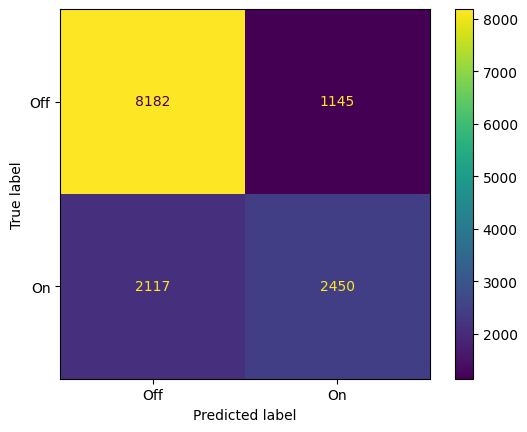

In [21]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_train, lr.predict(X_train))

In [19]:
len(lr.coef_[0])

54

In [ ]:
len(X_train.columns)

67

In [20]:
coef = pd.DataFrame({"Coefs": lr.coef_[0],
                    "Names": X_train.columns})
coef = coef.append({"Coefs": lr.intercept_[0],
                    "Names": "intercept"}, ignore_index = True)

In [21]:
print(coef)

       Coefs                            Names
0  -0.743101                       Send Count
1   1.103976                       Open Count
2  -0.502470                      Click Count
3  -0.259172                Unique Open Count
4  -0.000638               Unique Click Count
5   0.216046        USD Purchase Amount Clean
6  -1.316420                     Language_ARA
7  -1.443934                     Language_CHI
8  -1.782829                     Language_DAR
9  -1.293746                     Language_DEU
10 -1.256544                     Language_EBR
11 -1.120744                     Language_ENG
12 -1.218730                     Language_ESC
13 -1.115315                     Language_ESP
14 -1.334134                     Language_FAR
15 -1.208527                     Language_FRA
16 -1.434613                     Language_GLE
17 -0.862845                     Language_GRK
18 -0.717076                     Language_HEB
19 -0.823727                     Language_HIN
20 -1.158144                     L

In [ ]:
coef

,Coefs,Names
0,-0.747327,Send Count
1,0.796363,Open Count
2,-0.222556,Click Count
3,-0.105889,Unique Open Count
4,-0.009419,Unique Click Count
...,...,...
63,-0.553384,Email Subscriber_No
64,0.046201,Email Subscriber_Yes
65,-0.286179,Push Notifications_No
66,-0.221004,Push Notifications_Yes


In [22]:
coef["Odds Coef"] = np.exp(coef["Coefs"])
coef

,Coefs,Names,Odds Coef
0,-0.743101,Send Count,0.475637
1,1.103976,Open Count,3.016135
2,-0.502470,Click Count,0.605034
3,-0.259172,Unique Open Count,0.771690
4,-0.000638,Unique Click Count,0.999363
5,0.216046,USD Purchase Amount Clean,1.241159
6,-1.316420,Language_ARA,0.268093
7,-1.443934,Language_CHI,0.235997
8,-1.782829,Language_DAR,0.168162
9,-1.293746,Language_DEU,0.274242


In [26]:
def replace_column_values(df, column_name, word_to_replace, replacement):
    df[column_name] = df[column_name].str.replace(word_to_replace, replacement)
    return df

In [27]:
coef = replace_column_values(coef, 'Names', 'Language_', 'L_')

print(coef)

       Coefs                            Names   Odds Coef
0  -0.743101                       Send Count    0.475637
1   1.103976                       Open Count    3.016135
2  -0.502470                      Click Count    0.605034
3  -0.259172                Unique Open Count    0.771690
4  -0.000638               Unique Click Count    0.999363
5   0.216046        USD Purchase Amount Clean    1.241159
6  -1.316420                            L_ARA    0.268093
7  -1.443934                            L_CHI    0.235997
8  -1.782829                            L_DAR    0.168162
9  -1.293746                            L_DEU    0.274242
10 -1.256544                            L_EBR    0.284636
11 -1.120744                            L_ENG    0.326037
12 -1.218730                            L_ESC    0.295605
13 -1.115315                            L_ESP    0.327812
14 -1.334134                            L_FAR    0.263386
15 -1.208527                            L_FRA    0.298637
16 -1.434613  

In [28]:
coef.to_csv('LogisticRegressionCoefficientsV2.csv', index=False)

#QUESTION 1

yeah its outta order but uhhhh sorry

In [ ]:
predictors = [c for c in subscriberInfo.columns if c != 'ID' and c != 'Purchase Amount' and c!= 'USD Purchase Amount' and c!= 'USD Purchase Amount Clean' and c!= 'Subscription Start Date' and c!= 'Subscription Expiration']

x = subscriberInfo[predictors]
y = subscriberInfo['USD Purchase Amount Clean']

In [ ]:
predictors

['Language',
 'Subscription Type',
 'Subscription Event Type',
 'Purchase Store',
 'Currency',
 'Demo User',
 'Free Trial User',
 'Auto Renew',
 'Country',
 'User Type',
 'Lead Platform',
 'Email Subscriber',
 'Push Notifications',
 'Send Count',
 'Open Count',
 'Click Count',
 'Unique Open Count',
 'Unique Click Count']

In [ ]:
object_columns = subscriberInfo.select_dtypes(include='object').columns.tolist()
object_columns

['Language',
 'Subscription Type',
 'Subscription Event Type',
 'Purchase Store',
 'Currency',
 'Demo User',
 'Free Trial User',
 'Auto Renew',
 'Country',
 'User Type',
 'Lead Platform',
 'Email Subscriber',
 'Push Notifications']

In [ ]:
x = pd.get_dummies(x, columns=object_columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=31415)

In [ ]:
z = StandardScaler()

predictors_cont = ['Send Count', 'Open Count', 'Click Count', 'Unique Open Count', 'Unique Click Count']

X_train[predictors_cont] = z.fit_transform(X_train[predictors_cont])
X_test[predictors_cont] = z.transform(X_test[predictors_cont])



In [ ]:
y_train

18073    189.00
18170      0.00
16452    119.00
23071      0.00
26090     52.87
          ...  
6439      35.97
31142      0.00
9350       0.00
31712    199.00
15586     79.00
Name: USD Purchase Amount Clean, Length: 13894, dtype: float64

In [ ]:
X_train

,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count,Language_ALL,Language_ARA,Language_CHI,Language_DAR,Language_DEU,Language_EBR,Language_ENG,Language_ESC,Language_ESP,Language_FAR,Language_FRA,Language_GLE,Language_GRK,Language_HEB,Language_HIN,Language_IND,Language_ITA,Language_JPN,Language_KIS,Language_KOR,Language_LAT,Language_NED,Language_PAS,Language_POL,Language_POR,Language_RUS,Language_SVE,Language_TGL,Language_TUR,Language_URD,Language_VIE,Subscription Type_Lifetime,Subscription Type_Limited,Subscription Event Type_INITIAL_PURCHASE,Subscription Event Type_RENEWAL,Purchase Store_App,Purchase Store_Web,Currency_BGN,Currency_CAD,Currency_EUR,Currency_GBP,Currency_MXN,Currency_SEK,Currency_USD,Demo User_No,Demo User_Yes,Free Trial User_No,Free Trial User_Yes,Auto Renew_Off,Auto Renew_On,Country_Europe,Country_Other,Country_US/Canada,User Type_Consumer,User Type_Other,Lead Platform_App,Lead Platform_Unknown,Lead Platform_Web,Email Subscriber_No,Email Subscriber_Yes,Push Notifications_No,Push Notifications_Yes
18073,2.511072,2.237879,0.713596,2.144823,0.420740,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1
18170,-0.626615,-0.327423,-0.154921,-0.328944,-0.377861,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1
16452,-0.503912,-0.135025,-0.154921,-0.191513,-0.377861,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1
23071,-0.188390,-0.263290,-0.154921,-0.191513,-0.377861,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1
26090,-0.644144,-0.327423,-0.154921,-0.328944,-0.377861,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6439,-0.276035,-0.295356,-0.154921,-0.260229,-0.377861,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,1,0,0,0,1,0,1
31142,-0.644144,-0.327423,-0.154921,-0.328944,-0.377861,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1,0
9350,-0.065688,-0.327423,-0.154921,-0.328944,-0.377861,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,1
31712,2.458485,4.450451,1.466312,7.573368,0.420740,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,1


we do some grid seraching... 🥱

only run this once


For note purposes only
Cameron's code, Need to work on Question(s): 3
Question to answer: Identify the most likely subscribers who could be sold additional products or services


In [ ]:
#subscriberInfo is the name of proper data set
subscriberInfo['unique_click_rate'] = subscriberInfo['Unique Click Count'] / subscriberInfo['Send Count']
subscriberInfo.head()

,ID,Language,Subscription Type,Subscription Event Type,Purchase Store,Purchase Amount,Currency,Subscription Start Date,Subscription Expiration,Demo User,Free Trial User,Auto Renew,Country,User Type,Lead Platform,Email Subscriber,Push Notifications,Send Count,Open Count,Click Count,Unique Open Count,Unique Click Count,USD Purchase Amount,USD Purchase Amount Clean,unique_click_rate
1,2,EBR,Limited,INITIAL_PURCHASE,Web,39.00,USD,2019-11-28,2020-02-28,No,No,Off,Other,Consumer,Web,No,Yes,4,3,0,1,0,39.00,39.00,0.00
2,3,ESP,Limited,INITIAL_PURCHASE,Web,0.00,USD,2018-12-31,2019-12-31,No,No,Off,US/Canada,Consumer,Web,Yes,Yes,1,0,0,0,0,0.00,0.00,0.00
5,6,ESP,Limited,INITIAL_PURCHASE,Web,38.34,USD,2019-08-23,2019-11-23,Yes,No,Off,US/Canada,Consumer,App,Yes,Yes,162,1,0,1,0,38.34,38.34,0.00
6,7,ESP,Limited,RENEWAL,Web,79.00,USD,2019-07-21,2019-11-11,Yes,No,Off,Other,Consumer,App,Yes,Yes,2,0,0,0,0,79.00,79.00,0.00
7,8,DEU,Limited,INITIAL_PURCHASE,Web,38.40,USD,2020-03-07,2020-06-07,Yes,No,On,US/Canada,Consumer,App,Yes,Yes,25,17,4,7,2,38.40,38.40,0.08


In [ ]:
# Filter criteria
demo_user_filter = 'No'
auto_renew_filter = 'On'
email_subscriber_filter = 'Yes'
push_notifications_filter = 'Yes'

# Filter the subscriberInfo dataframe
sellable_subscriber = subscriberInfo[
    (subscriberInfo['Demo User'] == demo_user_filter) &
    (subscriberInfo['Auto Renew'] == auto_renew_filter) &
    (subscriberInfo['Email Subscriber'] == email_subscriber_filter) &
    (subscriberInfo['Push Notifications'] == push_notifications_filter)
]

# Print the filtered dataframe
print(sellable_subscriber)

          ID Language Subscription Type Subscription Event Type  \
13        14      ALL           Limited        INITIAL_PURCHASE   
17        18      SVE           Limited        INITIAL_PURCHASE   
64        65      ENG           Limited        INITIAL_PURCHASE   
68        69      ESC           Limited                 RENEWAL   
79        80      POL           Limited        INITIAL_PURCHASE   
...      ...      ...               ...                     ...   
39966  39865      FRA           Limited        INITIAL_PURCHASE   
39975  39874      EBR           Limited        INITIAL_PURCHASE   
40026  39925      ENG           Limited        INITIAL_PURCHASE   
40037  39936      NED           Limited        INITIAL_PURCHASE   
40070  39969      EBR           Limited        INITIAL_PURCHASE   

      Purchase Store  Purchase Amount Currency Subscription Start Date  \
13               Web           143.76      USD              2020-03-25   
17               Web            79.50      GBP 

ANSWER FOR #3 IS THIS GRAPH

In [ ]:
import plotly.express as px

fig = px.scatter(
    sellable_subscriber,
    x='unique_click_rate',
    y='Purchase Amount',
    color='Language',
    hover_data=['ID'],
    template='plotly',
    color_continuous_scale='viridis'
)

# Set the plot title and axis labels
fig.update_layout(
    title='Sellable Subscribers',
    xaxis_title='Unique Click Rate',
    yaxis_title='Purchase Amount'
)

# Show the plot
fig.show()


In [ ]:
pip install -U kaleido

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.offline as pyo
import plotly.graph_objects as go

# Create the Plotly figure
fig = px.scatter(
    sellable_subscriber,
    x='unique_click_rate',
    y='Purchase Amount',
    color='Language',
    hover_data=['ID'],
    template='plotly',
    color_continuous_scale='viridis'
)

# Set the plot title and axis labels
fig.update_layout(
    title='Sellable Subscribers',
    xaxis_title='Unique Click Rate',
    yaxis_title='Purchase Amount'
)

# Save the plot as an HTML file
pyo.plot(fig, filename='graph.html')


'graph.html'

In [ ]:
params = {'max_depth': [3,6,10],
          'learning_rate': [0.05, 0.1, 0.15],
          'n_estimators': [100, 500, 1000],
          'colsample_bytree': [0.3, 0.7],
          'early_stopping_rounds': [None]
          }

xgbReg = xgb.XGBRegressor()


clf = GridSearchCV(estimator=xgbReg,
                   param_grid=params,
                   scoring='neg_mean_squared_error',
                   verbose=2)

clf.fit(X_train, y_train)

print("Best parameters:", clf.best_params_)

In [ ]:
xgbReg = xgb.XGBRegressor(objective ='reg:squarederror',
                  n_estimators = 100,
                  max_depth=6,
                  learning_rate=0.1,
                  early_stopping_rounds=None,
                  colsample_bytree=0.7)
                  
xgbReg.fit(X_train, y_train,
           eval_set=[(X_train, y_train), (X_test, y_test)],
           eval_metric='rmse', verbose = 1)

In [ ]:
xgb.plot_importance(xgbReg, max_num_features=30)
plt.show()

In [ ]:
feature_importances = xgbReg.feature_importances_

# print the feature importance scores
print(feature_importances)

In [ ]:
importance_scores = xgbReg.feature_importances_

# Normalize the importance scores and reshape them into a matrix
normalized_scores = importance_scores / np.sum(importance_scores)
coefficient_matrix = normalized_scores.reshape(1, -1)

# Convert the coefficient matrix into a dataframe for better visualization
feature_names = X_train.columns  
coefficient_df = pd.DataFrame(coefficient_matrix, columns=feature_names)

# Display the coefficient matrix
coefficient_df


In [ ]:
coefficient_df

In [ ]:
# Get feature importances
importances = xgbReg.feature_importances_

# Print feature importances
for i, importance in enumerate(importances):
    print(f"Feature {i}: {importance}")

In [ ]:
X_train.columns

In [ ]:
subscriberInfo.to_csv('Subscriber Info Cleaned (for tableau usage).csv', index=False)

In [ ]:
predictors = [c for c in subscriberInfo.columns if c != 'ID' and c != 'Purchase Amount' and c!= 'USD Purchase Amount' and c!= 'USD Purchase Amount Clean' and c!= 'Subscription Start Date' and c!= 'Subscription Expiration']

x = subscriberInfo[predictors]
y = subscriberInfo['USD Purchase Amount Clean']

In [ ]:
object_columns = subscriberInfo.select_dtypes(include='object').columns.tolist()
object_columns

In [ ]:
x = pd.get_dummies(x, columns=object_columns)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=31415)

In [ ]:
z = StandardScaler()

predictors_cont = ['Send Count', 'Open Count', 'Click Count', 'Unique Open Count', 'Unique Click Count']

X_train[predictors_cont] = z.fit_transform(X_train[predictors_cont])
X_test[predictors_cont] = z.transform(X_test[predictors_cont])



In [ ]:
from sklearn.linear_model import LinearRegression # Linear Regression Model
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score #model evaluation

# Create the logistic regression model
linearReg = LinearRegression()


# Fit the GridSearchCV object to the dataset
linearReg.fit(X_train, y_train)

# Test the SVM model on the testing data
y_pred_train = linearReg.predict(X_train)
y_pred_test = linearReg.predict(X_test)

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
    
r2 = r2_score(y_test, y_pred_test)

print("mse train:", mse_train)
print("mse test:", mse_test)
print("r2 score", r2)